In [44]:
#Messwerte:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
#Zeit
t_mess=np.linspace(0, 1900, 39)
print(t_mess)
#Spannungen:
U_mess=[1.28, 1.5, 1.68, 1.9, 2.10, 2.29, 2.45, 2.63, 2.78, 2.92, 3.06, 3.19, 3.24, 3.24, 3.27, 3.31, 3.35, 3.36, 3.38, 3.41, 3.42, 3.44, 3.47, 3.48, 3.5, 3.52, 3.54, 3.56, 3.59, 3.59, 3.60, 3.63, 3.66, 3.67, 3.66, 3.70, 3.70, 3.73, 3.75]
U_mess=np.array(U_mess)
print(U_mess)
#Beide Arrays sind gleich lang nix ist vergessen



[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900.]
[1.28 1.5  1.68 1.9  2.1  2.29 2.45 2.63 2.78 2.92 3.06 3.19 3.24 3.24
 3.27 3.31 3.35 3.36 3.38 3.41 3.42 3.44 3.47 3.48 3.5  3.52 3.54 3.56
 3.59 3.59 3.6  3.63 3.66 3.67 3.66 3.7  3.7  3.73 3.75]


[-9.07648153e-06  3.82379770e-02 -1.00000000e-02]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


C:\Users\David\AppData\Local\Temp\ipykernel_22936\2336113621.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov=sp.optimize.curve_fit(Eich_fit, T_eich, U_eich)


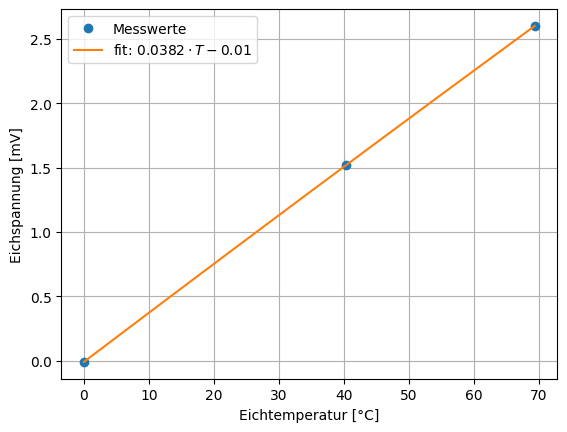

In [45]:
#Fit der Eichpunkte:

T_eich=[69.4, 40.4, 0]
U_eich=[2.6, 1.52, -0.01]

def Eich_fit(x, a, b ,c ):
    return a*x**2+b*x+c

popt, pcov=sp.optimize.curve_fit(Eich_fit, T_eich, U_eich)
print(popt)
print(pcov)

a_mod, b_mod, c_mod=popt
x_mod=np.linspace(min(T_eich), max(T_eich), 501)
y_mod=Eich_fit(x=x_mod, a=a_mod, b=b_mod, c=c_mod)


labelmod=rf'fit: ${b_mod:.4f} \cdot T {c_mod:.2f}$'
plt.plot(T_eich, U_eich, linestyle='', marker='o',label='Messwerte')
plt.plot(x_mod ,y_mod, linestyle='-', label=labelmod)
plt.grid(linestyle='-')
plt.legend()
plt.xlabel('Eichtemperatur [°C]')
plt.ylabel('Eichspannung [mV]')


plt.show()

In [46]:
#Umrechnung U_thermo in T Celsius

def U_thermo_in_T_Celsius(U_mess, a_mod, b_mod, c_mod):
    T=[]
    Tp=[]
    for i in range(len(U_mess)):
        xyz=( -b_mod + np.sqrt(b_mod**2 - 4 * a_mod*(c_mod-U_mess[i]) ) ) / (2 * a_mod)
        
        T.append(xyz)
    return T

T=U_thermo_in_T_Celsius(U_mess=U_mess, a_mod=a_mod, b_mod=b_mod, c_mod=c_mod)
print(T)
Tround=[]
for i in range(len(T)):
    Tround.append(round(T[i],3))
print(Tround)



[34.010664221066115, 39.86680084583683, 44.670557356259096, 50.55705834669732, 55.92308697689916, 61.03385349763879, 65.34758257909789, 70.21145128221721, 74.2735679380586, 78.0722164201596, 81.87799225323327, 85.41834403728281, 86.78167030371394, 86.78167030371394, 87.60010798056376, 88.69187462266272, 89.78423232206852, 90.05741421218376, 90.60388905598167, 91.4238792065177, 91.69728341963739, 92.24420318088649, 93.06486138712512, 93.33848846693236, 93.8858542341051, 94.43336891257032, 94.98103262392769, 95.52884548994315, 96.35084472072336, 96.35084472072336, 96.62491917384456, 97.44736687582778, 98.27015141334314, 98.5444878497534, 98.27015141334314, 99.36772214576096, 99.36772214576096, 100.19129424507669, 100.74053018527857]
[34.011, 39.867, 44.671, 50.557, 55.923, 61.034, 65.348, 70.211, 74.274, 78.072, 81.878, 85.418, 86.782, 86.782, 87.6, 88.692, 89.784, 90.057, 90.604, 91.424, 91.697, 92.244, 93.065, 93.338, 93.886, 94.433, 94.981, 95.529, 96.351, 96.351, 96.625, 97.447, 98.2

In [47]:
#Berechnung Heizsleistung
U_vers = 5.94
I_vers = 1.77
P_h=U_vers*I_vers

print(P_h)
# Fit für die Schmelzkurve
def kurve_fest_fit( x, T_u, R_th, C_tot):
    return T_u + P_h * R_th *( 1 - np.exp(-x / (R_th * C_tot)))



popt2, pcov2=sp.optimize.curve_fit(kurve_fest_fit, t_mess[0:12], T[0:12] )
print(popt2)
print(pcov2)

T_u_mod, R_th_mod, C_tot_mod = popt2

x_mod2=np.linspace(t_mess[0], t_mess[11], 501)
y_mod=kurve_fest_fit(x=x_mod2, T_u=T_u_mod, R_th=R_th_mod, C_tot=C_tot_mod)





10.513800000000002
[33.72797159 11.78343545 86.08997708]
[[0.05704488 0.09359107 0.32358195]
 [0.09359107 0.43249814 1.00279111]
 [0.32358195 1.00279111 2.72016996]]


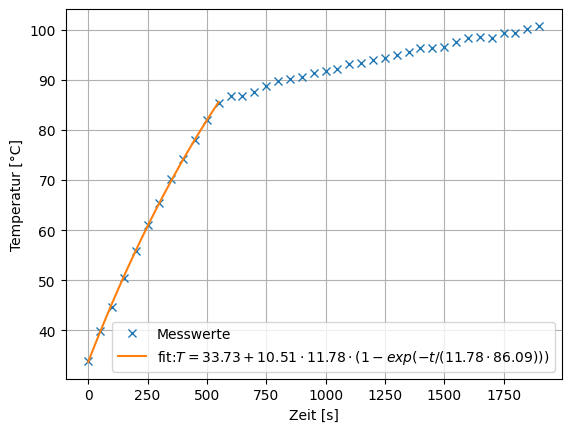

<Figure size 1800x1000 with 0 Axes>

In [48]:
#plot Zeit-Temperatur


plt.plot(t_mess, T, linestyle='', marker='x', label='Messwerte')
labelexp=rf'fit:$T={T_u_mod:.2f}+{P_h:.2f} \cdot{R_th_mod:.2f}\cdot (1-exp(-t/({R_th_mod:.2f}\cdot {C_tot_mod:.2f})))$'
plt.plot(x_mod2, y_mod, linestyle='-', marker='', label=labelexp)
plt.grid(linestyle='-')
#label lässt sich so verkleinern
mpl.rcParams.update({'font.size': 10})

plt.legend()
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [°C]')
plt.figure(figsize=(18,10))
plt.show()

#versuch hohe Qualität nix gut bis jetzt


In [49]:
#Unsicherheiten der Knickpunkte:
#1. Knickpunkt liegt bei T(600s)=86.7 °C
T_knick1=[78.04071205717595, 81.82802639074289, 85.34865320269431, 86.70372629866041, 86.70372629866041, 87.51703349935589, 88.60175063264099]
#Mittelwert
T_mean1=np.mean(T_knick1)
#Standartfehler des Mittelwerts 
T_knick1_std=np.std(T_knick1, ddof=1)/np.sqrt(len(T_knick1))


print(T_mean1)


#2. Knickpunkt ist nicht vorhanden, die letzten 7 Messwerte werden als verwendet.

T_knick2=[98.10806896486524, 98.38007610150076, 98.10806896486524, 99.19623061362111, 99.19623061362111, 100.01258489309406, 100.55693213373868]

T_mean2=np.mean(T_knick2)

T_knick2_std=np.std(T_knick2, ddof=1)/np.sqrt(len(T_knick2))

84.96337548284725


In [50]:
T_t2_scale = T[27:33] # Vom 28ten bis zum 34ten
print(T_t2_scale)

T_t2_scale_mean =np.mean(T[27:33])
print(T_t2_scale_mean)

[95.52884548994315, 96.35084472072336, 96.35084472072336, 96.62491917384456, 97.44736687582778, 98.27015141334314]
96.76216206573423


In [51]:
import sympy as sp
import numpy as np
# Fehler von C_E
# Masse der Probe = m_p

def delta_C(delt_c_E, delt_m_p):
    c_E = sp.symbols("c_E")
    m_p = sp.symbols("m_p")
    c = c_E / m_p
    dif_c_E = sp.diff(c, c_E)
    dif_m_p = sp.diff(c, m_p)
    delt_c = sp.sqrt((dif_c_E*delt_c_E)**2 + (dif_m_p*delt_m_p)**2)
    return delt_c

delta = delta_C(delt_c_E=2.5, delt_m_p=0.2)
print(delta)

c_E_val = 62.666
m_p_val = 356.7

delta_finished = delta.subs({sp.symbols('c_E'): c_E_val, sp.symbols('m_p'): m_p_val}).evalf()
print(delta_finished)

2.5*sqrt(0.0064*c_E**2/m_p**4 + m_p**(-2))
0.00700938296312303


In [52]:
#2. Knickpunkt
t_values = np.array([1400, 1450, 1500, 1550, 1600, 1650, 1700])
T_values = np.array([95.39, 96.20, 96.20, 96.48, 97.29, 98.11, 96.61])

# Mittelwerte berechnen
mean_t = np.mean(t_values)
mean_T = np.mean(T_values)

# Standardabweichungen berechnen
std_t = np.std(t_values, ddof=1)  
std_T = np.std(T_values, ddof=1)

print(f'Mittelwert von t: {mean_t:.2f}')
print(f'Standardabweichung von t: {std_t:.2f}')
print(f'Mittelwert von T: {mean_T:.2f}')
print(f'Standardabweichung von T: {std_T:.2f}')

Mittelwert von t: 1550.00
Standardabweichung von t: 108.01
Mittelwert von T: 96.61
Standardabweichung von T: 0.87


In [53]:
# Mitteln der Temperaturen zwischen Knick 1 und Knick 2 für die Schmelztemperatur

# t_2 = 1550 # t_1 = T(600s)=86.7 °C
# T_u ist 21 °C


  
